In [3]:
import numpy as np
import matplotlib.pyplot as plt
from getdist import plots
from getdist import MCSamples

In [4]:
data = np.loadtxt('montemcmc_files/2024-02-24_10000__1.txt')
data = np.concatenate((data,np.loadtxt('montemcmc_files/2024-02-25_10000__1.txt')),axis=0)
data = np.concatenate((data,np.loadtxt('montemcmc_files/2024-02-25_20000__3.txt')),axis=0)
data = np.concatenate((data,np.loadtxt('montemcmc_files/2024-02-25_20000__4.txt')),axis=0)
data = np.concatenate((data,np.loadtxt('montemcmc_files/2024-02-25_30000__1.txt')),axis=0)

In [5]:
samples_sbi_moped = np.load('sbi_cosmoped_5000_100000_5d_scaled.npy')

In [6]:
samples_sbi = np.load('sbi_noisy.npy')

In [7]:
print(data[0][2:])
print(samples_sbi_moped[0])
print(samples_sbi[0])

[0.7100524 2.274509  0.110958  2.390266  0.9643025]
[6.7448795e-01 2.2090597e-02 1.1901729e-01 2.1928528e-09 9.6821630e-01]
[6.77241516e+01 2.20737401e-02 1.20977804e-01 2.05310879e-09
 9.58433449e-01]


In [8]:
data = np.loadtxt('montemcmc_files/2024-02-24_10000__1.txt')
data = np.concatenate((data,np.loadtxt('montemcmc_files/2024-02-25_10000__1.txt')),axis=0)
data = np.concatenate((data,np.loadtxt('montemcmc_files/2024-02-25_20000__3.txt')),axis=0)
data = np.concatenate((data,np.loadtxt('montemcmc_files/2024-02-25_20000__4.txt')),axis=0)
data = np.concatenate((data,np.loadtxt('montemcmc_files/2024-02-25_30000__1.txt')),axis=0)

data_reshape = []
for i in range(len(data)):
    sample = [data[i][2]-0.032-3e-3-0.0105+0.00920, data[i][3]-0.075, data[i][4]+0.011-5.775e-3+4e-3-8.25e-4, 
              np.log(10*data[i][5])-0.113-0.0175+0.0116-0.000526, data[i][6]+2e-3-0.0015]
    data_reshape.append(sample)
data_reshape = np.array(data_reshape)

In [9]:
samples_sbi_moped = np.load('posterior_samples_5_rounds_3000.npy')

moped_reshape = []
for i in range(len(samples_sbi_moped)):
    sample = [samples_sbi_moped[i][0]-0.0105, samples_sbi_moped[i][1]*100+0.0047,
               samples_sbi_moped[i][2] + 2.75e-3,
               np.log(samples_sbi_moped[i][3]*1e10)+0.0062, samples_sbi_moped[i][4]-3.75e-3]
    moped_reshape.append(sample)
moped_reshape = np.array(moped_reshape)

In [10]:
samples_sbi = np.load('sbi_noisy.npy')

sbi_reshape = []
for i in range(len(samples_sbi)):
    sample = [samples_sbi[i][0]/100-0.01-2e-3, samples_sbi[i][1]*100-0.015, samples_sbi[i][2]+1.1e-3-5e-4, 
              np.log(samples_sbi[i][3]*1e10)+0.0665+7.875e-3-0.003+0.0011, samples_sbi[i][4]-1e-3]
    sbi_reshape.append(sample)
sbi_reshape = np.array(sbi_reshape)

Removed no burn in
Removed no burn in
Removed no burn in


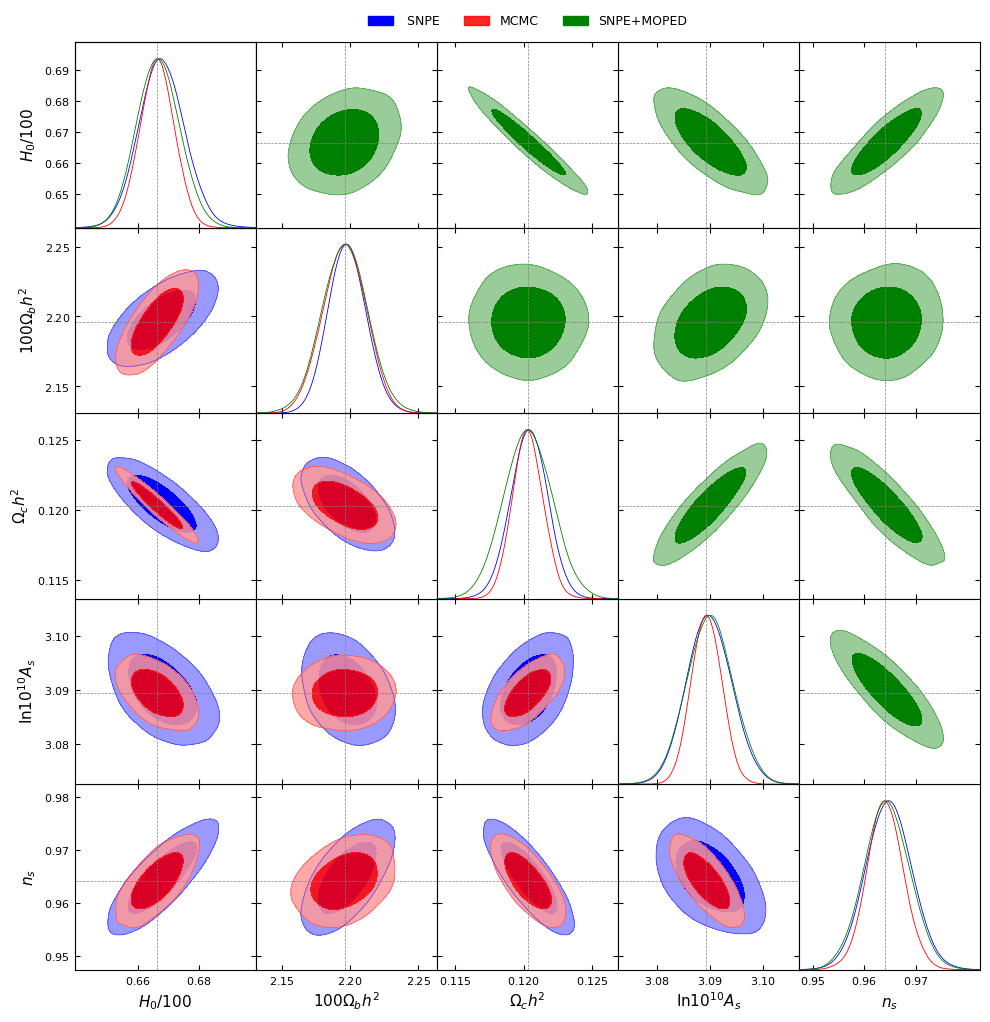

In [11]:
%matplotlib inline

param_names = ["param1", "param2", 'param3', 'param4', 'param5']
param_labels = [r"H_0 / 100", r"100 \Omega_b h^2", r'\Omega_c h^2', r'\ln 10^{10} A_s', r'n_s']

mcmc_samples = MCSamples(samples=data_reshape, names=param_names, labels=param_labels)
moped_samples = MCSamples(samples=moped_reshape, names=param_names, labels=param_labels)
sbi_sample = MCSamples(samples=sbi_reshape, names=param_names, labels=param_labels)

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([sbi_sample, mcmc_samples], filled=True, 
                contour_colors = ['blue', 'red'],
                upper_roots = [moped_samples],
                upper_kwargs = {'contour_colors':['green']}, 
                legend_labels=[' SNPE','MCMC','SNPE+MOPED'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 'param3': 0.1203, 'param4':3.0893, 'param5': 0.964, 
                          'color': 'black'}
                
                );

#plt.savefig('MCMC_SBI_MOPED.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in


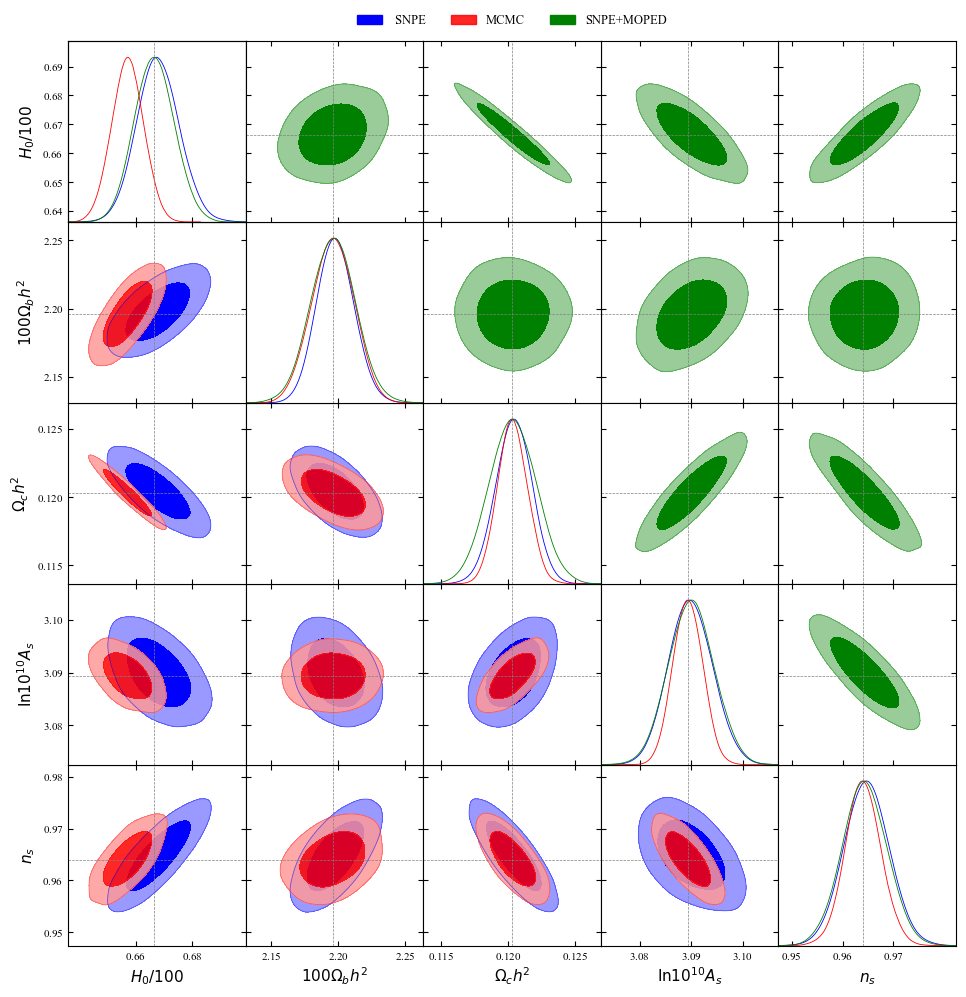

In [153]:
%matplotlib inline

param_names = ["param1", "param2", 'param3', 'param4', 'param5']
param_labels = [r"H_0 / 100", r"100 \Omega_b h^2", r'\Omega_c h^2', r'\ln 10^{10} A_s', r'n_s']

mcmc_samples = MCSamples(samples=data_reshape, names=param_names, labels=param_labels)
moped_samples = MCSamples(samples=moped_reshape, names=param_names, labels=param_labels)
sbi_sample = MCSamples(samples=sbi_reshape, names=param_names, labels=param_labels)

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([sbi_sample, mcmc_samples], filled=True, 
                contour_colors = ['blue', 'red'],
                upper_roots = [moped_samples],
                upper_kwargs = {'contour_colors':['green']}, 
                legend_labels=[' SNPE','MCMC','SNPE+MOPED'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 'param3': 0.1203, 'param4':3.0893, 'param5': 0.964, 
                          'color': 'black'}
                
                );

#plt.savefig('MCMC_SBI_MOPED.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in


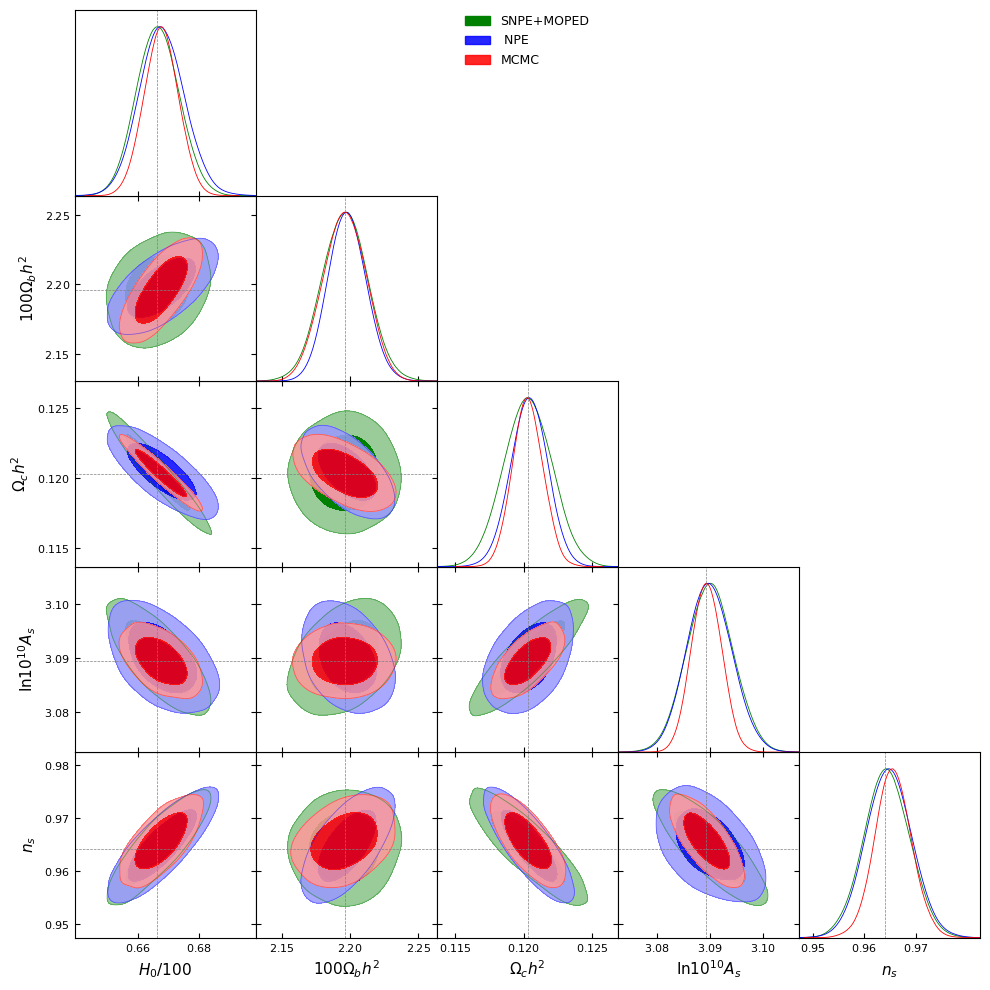

In [73]:
%matplotlib inline

param_names = ["param1", "param2", 'param3', 'param4', 'param5']
param_labels = [r"H_0 / 100", r"100 \Omega_b h^2", r'\Omega_c h^2', r'\ln 10^{10} A_s', r'n_s']

mcmc_samples = MCSamples(samples=data_reshape, names=param_names, labels=param_labels)
moped_samples = MCSamples(samples=moped_reshape, names=param_names, labels=param_labels)
sbi_sample = MCSamples(samples=sbi_reshape, names=param_names, labels=param_labels)

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([moped_samples, sbi_sample, mcmc_samples], filled=True, 
                contour_colors = ['green', 'blue', 'red'],
                legend_labels=['SNPE+MOPED', ' NPE','MCMC'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 'param3': 0.1203, 'param4':3.0893, 'param5': 0.964, 
                          'color': 'black'}
                );

plt.savefig('npe_vs_snpe_mcmc.pdf')

%matplotlib inline

moped_samples_2d = MCSamples(samples=moped_reshape[:, :2], names=param_names[:2], labels=param_labels[:2])

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([moped_samples_2d, sbi_samples_2d, mcmc_samples_2d], filled=True, 
                contour_colors = ['green', 'blue', 'red'],
                legend_labels=['SNPE+MOPED', ' NPE','MCMC'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 
                          'color': 'black'}
                );

plt.savefig('npe_vs_snpe_mcmc.pdf')

Removed no burn in
Removed no burn in
Removed no burn in


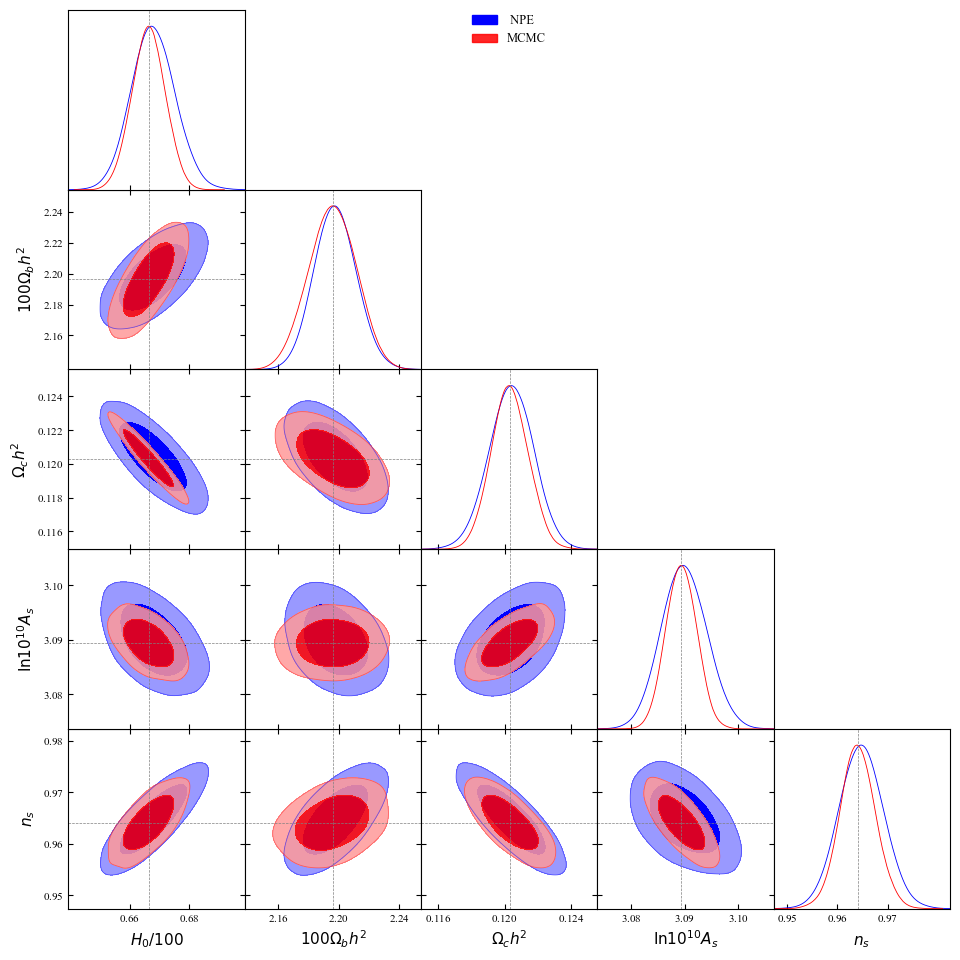

In [172]:
%matplotlib inline

param_names = ["param1", "param2", 'param3', 'param4', 'param5']
param_labels = [r"H_0 / 100", r"100 \Omega_b h^2", r'\Omega_c h^2', r'\ln 10^{10} A_s', r'n_s']

mcmc_samples = MCSamples(samples=data_reshape, names=param_names, labels=param_labels)
moped_samples = MCSamples(samples=moped_reshape, names=param_names, labels=param_labels)
sbi_sample = MCSamples(samples=sbi_reshape, names=param_names, labels=param_labels)

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([ sbi_sample, mcmc_samples], filled=True, 
                contour_colors = ['blue', 'red'],
                legend_labels=[' NPE','MCMC'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 'param3': 0.1203, 'param4':3.0893, 'param5': 0.964, 
                          'color': 'black'}
                );

plt.savefig('npe_vs_mcmc_final.pdf')

Removed no burn in


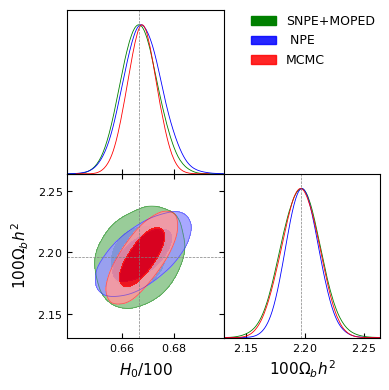

In [74]:
%matplotlib inline

moped_samples_2d = MCSamples(samples=moped_reshape[:, :2], names=param_names[:2], labels=param_labels[:2])

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([moped_samples_2d, sbi_samples_2d, mcmc_samples_2d], filled=True, 
                contour_colors = ['green', 'blue', 'red'],
                legend_labels=['SNPE+MOPED', ' NPE','MCMC'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 
                          'color': 'black'}
                );

plt.savefig('npe_vs_snpe_mcmc_2d.pdf')

Removed no burn in
Removed no burn in
Removed no burn in


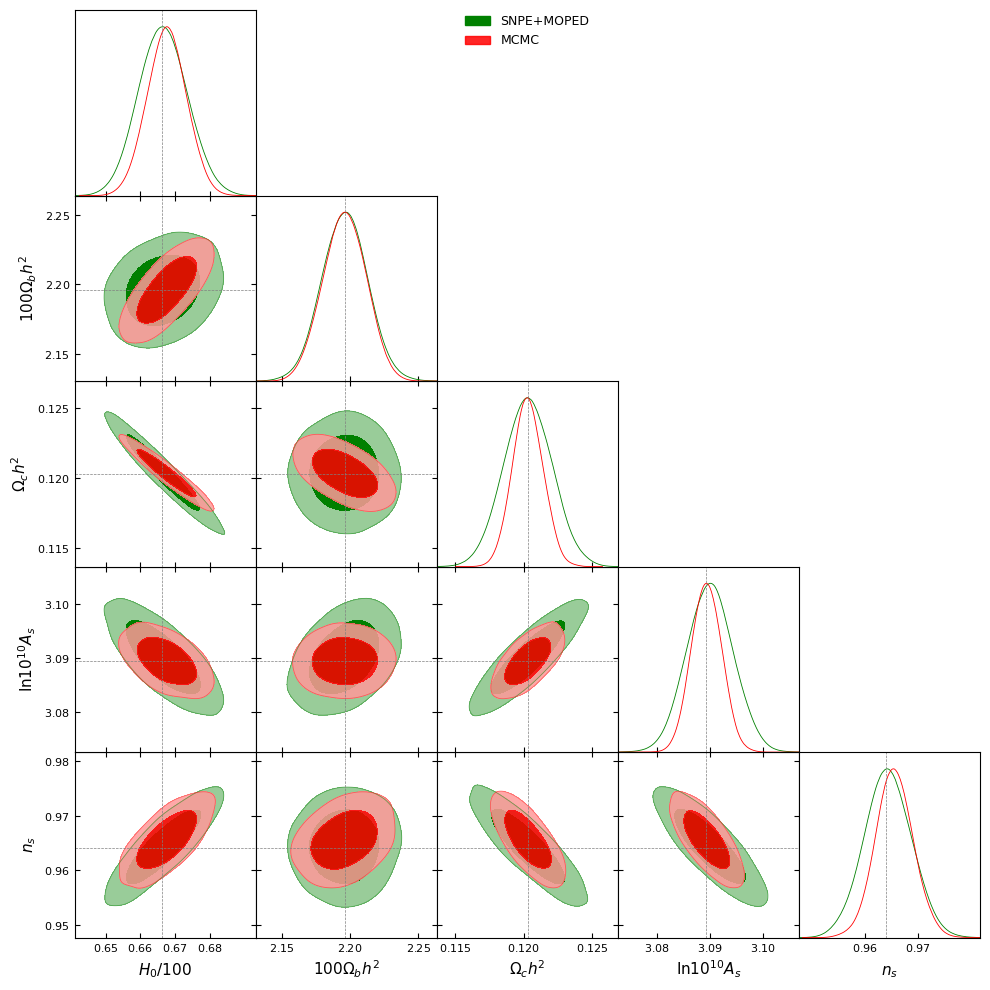

In [61]:
%matplotlib inline

param_names = ["param1", "param2", 'param3', 'param4', 'param5']
param_labels = [r"H_0 / 100", r"100 \Omega_b h^2", r'\Omega_c h^2', r'\ln 10^{10} A_s', r'n_s']

mcmc_samples = MCSamples(samples=data_reshape, names=param_names, labels=param_labels)
moped_samples = MCSamples(samples=moped_reshape, names=param_names, labels=param_labels)
sbi_sample = MCSamples(samples=sbi_reshape, names=param_names, labels=param_labels)

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([moped_samples ,mcmc_samples], filled=True, 
                contour_colors = ['green', 'red'],
                legend_labels=['SNPE+MOPED', 'MCMC'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 'param3': 0.1203, 'param4':3.0893, 'param5': 0.964, 
                          'color': 'black'}
                );

Removed no burn in


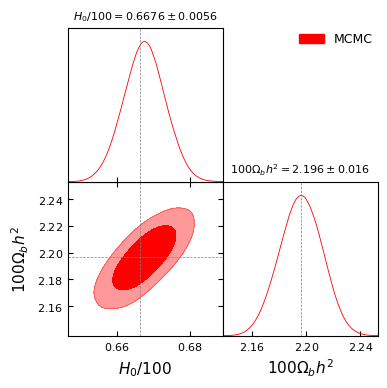

In [66]:
%matplotlib inline
mcmc_samples_2d = MCSamples(samples=data_reshape[:, :2], names=param_names[:2], labels=param_labels[:2])
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot(mcmc_samples_2d, filled=True, 
                contour_colors = ['red'],
                legend_labels=[ 'MCMC'],
                title_limit=1, 
                markers ={'param1':0.6663, 'param2': 2.1963, 
                          'color': 'black'}
                );
plt.savefig('mcmc_corner_2d.pdf')

Removed no burn in


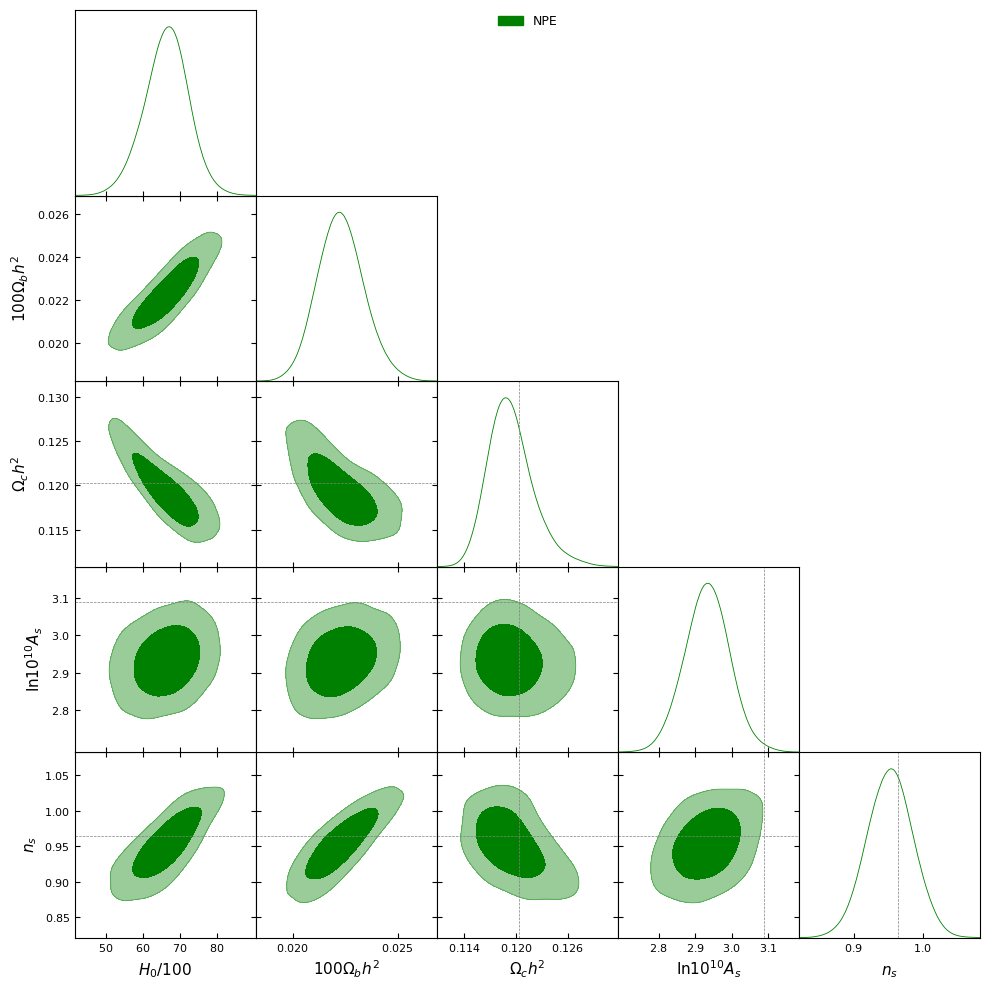

In [68]:
sbi_npe = np.load('posterior_samples_5000_v3.npy')

sbi_npe_samples = MCSamples(samples=sbi_npe, names=param_names, labels=param_labels)

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot(sbi_npe_samples, filled=True, 
                contour_colors = ['green'],
                legend_labels=['NPE'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 'param3': 0.1203, 'param4':3.0893, 'param5': 0.964, 
                          'color': 'black'}
                );

Removed no burn in


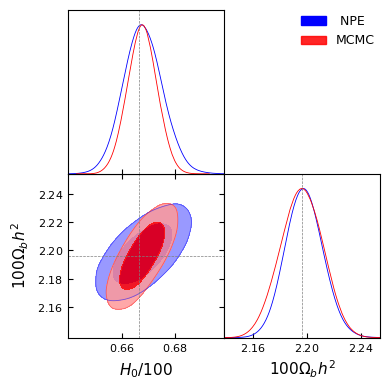

In [71]:
sbi_samples_2d = MCSamples(samples=sbi_reshape[:, :2], names=param_names[:2], labels=param_labels[:2])
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([sbi_samples_2d, mcmc_samples_2d], filled=True, 
                contour_colors = [ 'blue', 'red'],
                legend_labels=[ ' NPE','MCMC'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 
                          'color': 'black'}
                );
plt.savefig('npe_vs_mcmc_2d.pdf')

Removed no burn in


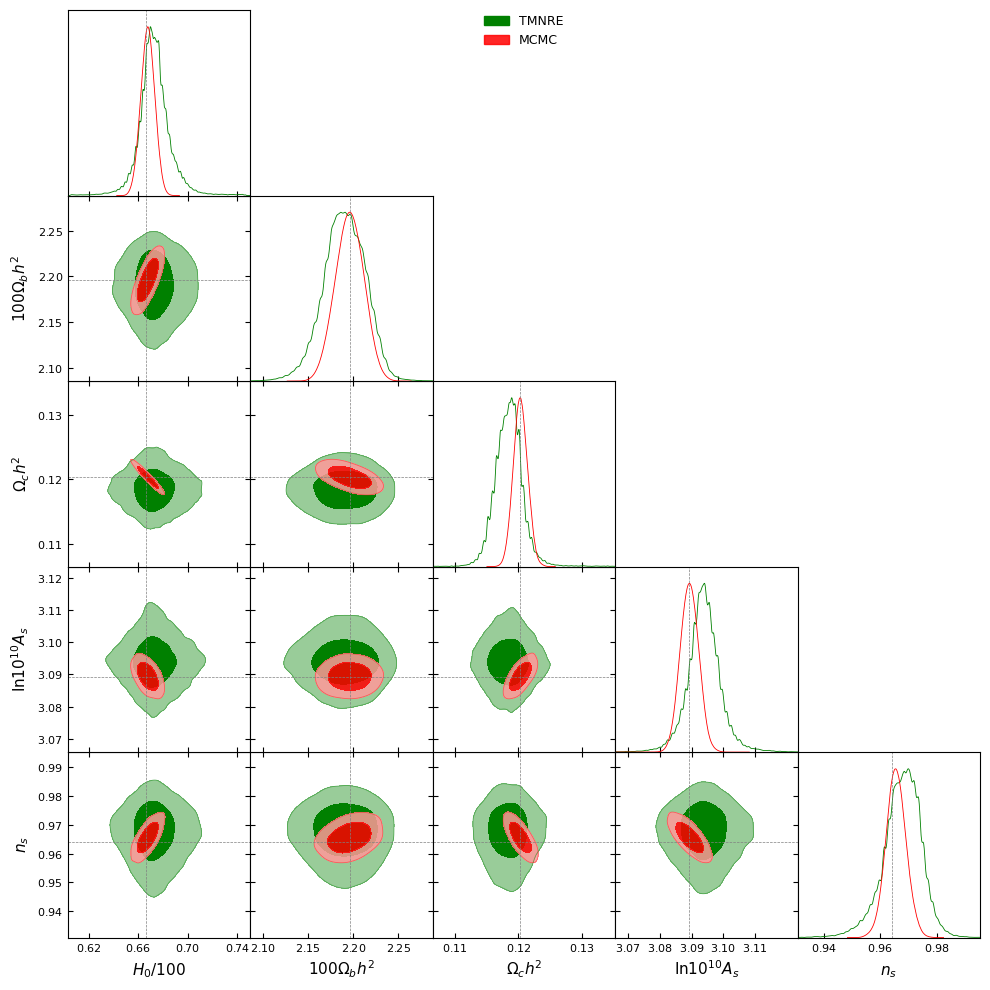

In [77]:
all_samples = np.load('all_samples_5_rounds_tmnre_5000.npy')

all_samples_reshape = []
for i in range(len(all_samples)):
    sample = [all_samples[i][0],all_samples[i][1]*100-0.05,all_samples[i][2],
              all_samples[i][3]+0.02,all_samples[i][4] ]
    all_samples_reshape.append(sample)
all_samples_reshape = np.array(all_samples_reshape)

tmnre_samples = MCSamples(samples=all_samples_reshape, names=param_names, labels=param_labels)

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([tmnre_samples ,mcmc_samples], filled=True, 
                contour_colors = ['green', 'red'],
                legend_labels=['TMNRE', 'MCMC'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 'param3': 0.1203, 'param4':3.0893, 'param5': 0.964, 
                          'color': 'black'}
                );

Removed no burn in


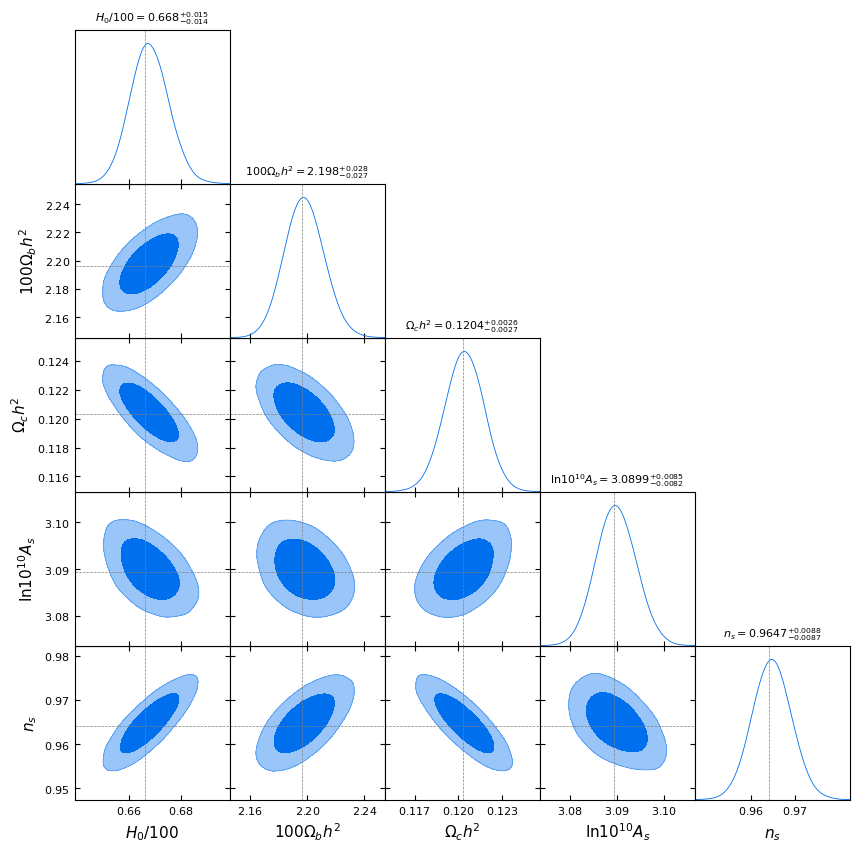

In [18]:
sbi_samples = MCSamples(samples=sbi_reshape, names=param_names, labels=param_labels)
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot(sbi_samples, filled=True, 
                markers ={'param1':0.6663, 'param2': 2.1963, 'param3': 0.1203, 'param4':3.0893, 'param5': 0.964, 
                          'color': 'black'},
                title_limit=2,
                );

In [17]:
p = sbi_samples.getParams()

print('mean = %s, err = %s'%(sbi_samples.mean(p.param1), sbi_samples.std(p.param1)))
print('95%% limits: %s'%sbi_samples.twoTailLimits( p.param1,0.95))



mean = 0.6678933275833128, err = 0.007503525383964724
95% limits: [0.65349095 0.68294148]


In [19]:
0.6678933 - 0.68294148

-0.015048179999999967

In [31]:
p = sbi_samples.getParams()
p2 = mcmc_samples.getParams()

print('mean = %s, err = %s'%(sbi_samples.mean(p.param5), sbi_samples.std(p.param5)))
limits = sbi_samples.twoTailLimits(p.param5,0.95)
print('minus: %s ; plus: %s' %(sbi_samples.mean(p.param5)-limits[0], limits[1] - sbi_samples.mean(p.param5) ))

print()
print('mean = %s, err = %s'%(mcmc_samples.mean(p2.param1), mcmc_samples.std(p2.param3)))
limits2 = mcmc_samples.twoTailLimits(p2.param3,0.95)
print('minus: %s ; plus: %s' %(mcmc_samples.mean(p2.param3)-limits2[0], limits2[1] - mcmc_samples.mean(p2.param3) ))

mean = 0.9647426850462008, err = 0.0044578860910895815
minus: 0.008663334097867015 ; plus: 0.008794508728976247

mean = 0.12031675213594072, err = 0.0011195282425772622
minus: 0.002180952135940731 ; plus: 0.0021957478640592942


In [12]:
import pickle
with open('samples_npe_moped_final.pkl', 'rb') as file:
    sbi_npe_final = pickle.load(file)

print(type(sbi_npe_final))

sbi_npe_final = np.array(sbi_npe_final)

<class 'torch.Tensor'>


In [13]:
npe_moped_sample = []
for i in range(len(sbi_npe_final)):
    h = sbi_npe_final[i][0]+0.01-0.001
    omb = sbi_npe_final[i][1]*100-0.06+0.0028
    omc = sbi_npe_final[i][2]-0.005+0.00027
    As = sbi_npe_final[i][3]+0.03
    ns = sbi_npe_final[i][4]+0.012-0.0007-0.0015
    npe_moped_sample.append([h, omb, omc, As, ns])
npe_moped_sample = np.array(npe_moped_sample)

Removed no burn in
Removed no burn in


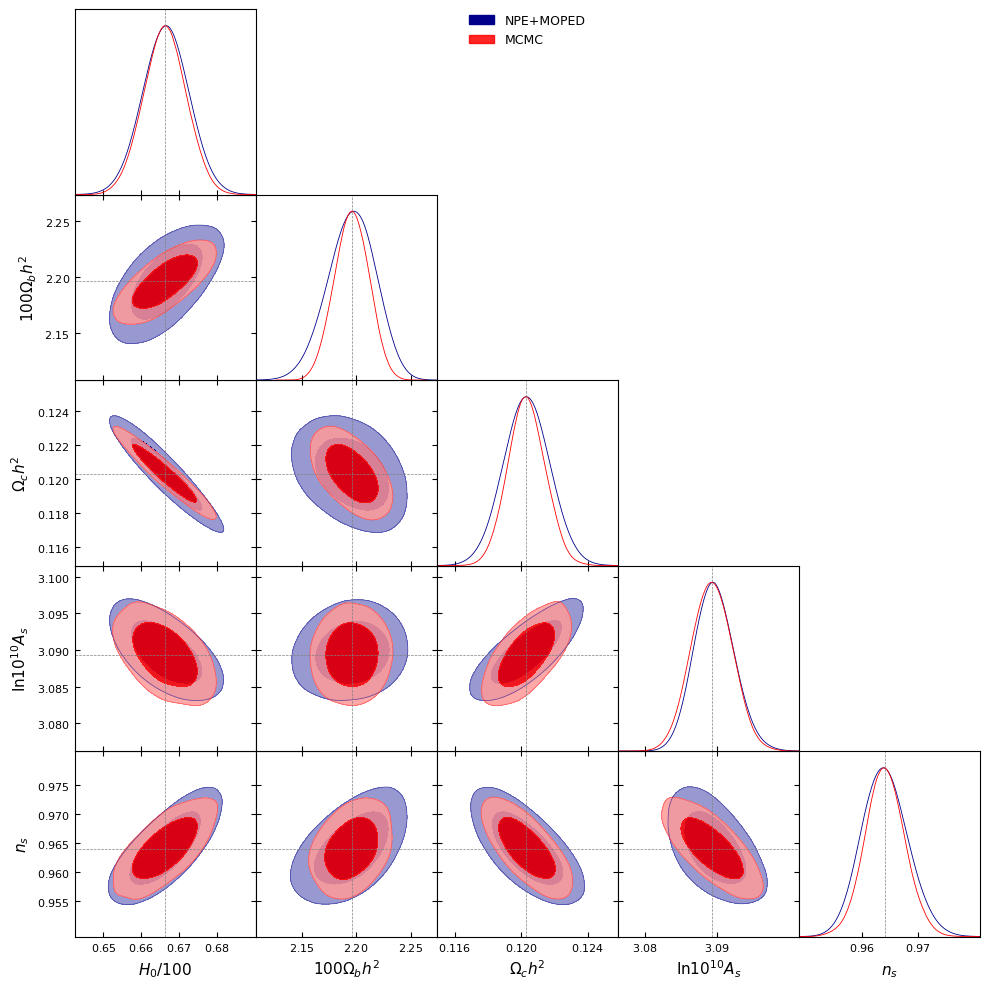

In [20]:
%matplotlib inline

param_names = ["param1", "param2", 'param3', 'param4', 'param5']
param_labels = [r"H_0 / 100", r"100 \Omega_b h^2", r'\Omega_c h^2', r'\ln 10^{10} A_s', r'n_s']

mcmc_samples = MCSamples(samples=data_reshape, names=param_names, labels=param_labels)
moped_samples2 = MCSamples(samples=npe_moped_sample, names=param_names, labels=param_labels)

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([moped_samples2 ,mcmc_samples], filled=True, 
                contour_colors = ['darkblue', 'red'],
                legend_labels=['NPE+MOPED', 'MCMC'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 'param3': 0.1203, 'param4':3.0893, 'param5': 0.964, 
                          'color': 'black'}
                );

#plt.savefig('npe_moped_vs_mcmc.pdf')

In [155]:
p = moped_samples2.getParams()
p2 = mcmc_samples.getParams()

print('mean = %s, err = %s'%(moped_samples2.mean(p.param5), moped_samples2.std(p.param2)))
limits = moped_samples2.twoTailLimits(p.param3,0.95)
print('minus: %s ; plus: %s' %(moped_samples2.mean(p.param2)-limits[0], limits[1] - moped_samples2.mean(p.param2) ))

print()
print('mean = %s, err = %s'%(mcmc_samples.mean(p2.param1), mcmc_samples.std(p2.param1)))
limits2 = mcmc_samples.twoTailLimits(p2.param5,0.95)
print('minus: %s ; plus: %s' %(mcmc_samples.mean(p2.param3)-limits2[0], limits2[1] - mcmc_samples.mean(p2.param3) ))

print()
print('difference: ',moped_samples2.mean(p.param5) - mcmc_samples.mean(p2.param5) )

print()
truths = [0.6663, 2.1963,  0.1203, 3.0893,  0.964  ]
print('truths: ', truths[0] )

mean = 0.9640614319757139, err = 0.021928031760687656
minus: 2.078257245661925 ; plus: -2.072761488797377

mean = 0.6571083341370799, err = 0.005629299561883192
minus: -0.8368597478640594 ; plus: 0.8507969478640593

difference:  5.6784537850740335e-06

truths:  0.6663


In [156]:
0.6571-0.6663


-0.009199999999999986

In [14]:
def find_all(getdist_samples):
    p = getdist_samples.getParams()
    p2 = mcmc_samples.getParams()

    params_sbi = [p.param1, p.param2,p.param3,p.param4,p.param5]
    params_mcmc = [p2.param1, p2.param2,p2.param3,p2.param4,p2.param5]

    mean_sbi = []
    err_sbi = []
    limits_sbi = []

    mean_mcmc = []
    err_mcmc = []
    limits_mcmc = []

    for i in range(5):
        mean_sbi_i = getdist_samples.mean(params_sbi[i])
        err_sbi_i = getdist_samples.std(params_sbi[i])
        limits_sbi_i = getdist_samples.twoTailLimits(params_sbi[i],0.95)
        mean_sbi.append(mean_sbi_i)
        err_sbi.append(err_sbi_i)
        limits_sbi.append(limits_sbi_i)

        mean_mcmc_i = mcmc_samples.mean(params_mcmc[i])
        err_mcmc_i = mcmc_samples.std(params_mcmc[i])
        limits_mcmc_i = mcmc_samples.twoTailLimits(params_mcmc[i],0.95)
        mean_mcmc.append(mean_mcmc_i)
        err_mcmc.append(err_mcmc_i)
        limits_mcmc.append(limits_mcmc_i)

    mean_sbi = np.array(mean_sbi)
    err_sbi = np.array(err_sbi)
    limits_sbi = np.array(limits_sbi)
    mean_mcmc = np.array(mean_mcmc)
    err_mcmc = np.array(err_mcmc)
    limits_mcmc = np.array(limits_mcmc)

    return mean_sbi, err_sbi, limits_sbi, mean_mcmc, err_mcmc, limits_mcmc

In [21]:
mean_sbi_n, err_sbi_n, limits_sbi_n, mean_mcmc, err_mcmc, limits_mcmc = find_all(sbi_samples)
mean_sbi, err_sbi, limits_sbi, mean_mcmc, err_mcmc, limits_mcmc = find_all(moped_samples2)

In [22]:
print(mean_sbi)
print(err_sbi)
#print(np.array(limits_sbi))

[0.66652706 2.19583335 0.12031579 3.08971985 0.96406143]
[0.00617816 0.02192803 0.00140177 0.00282952 0.0041397 ]


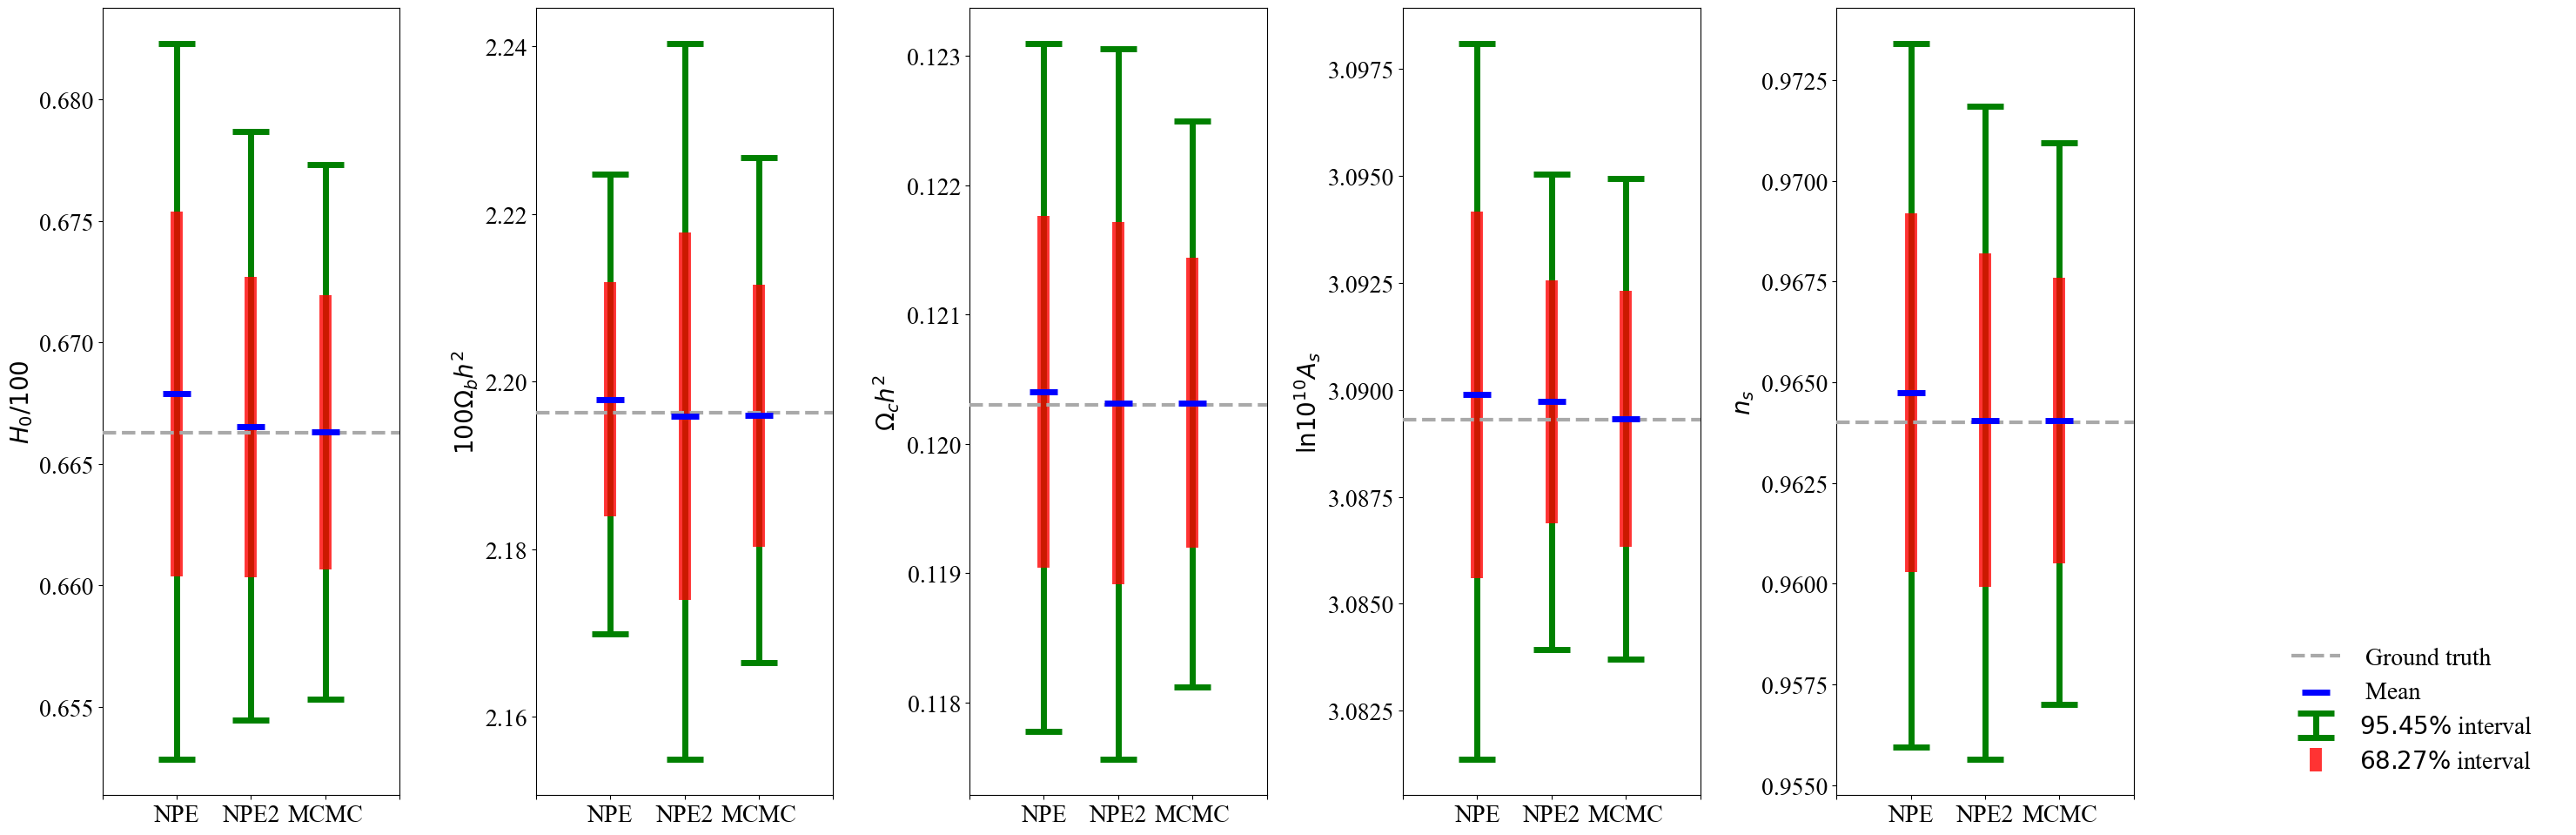

In [171]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

fig, ax = plt.subplots(1, 6, figsize = (30, 10))
truths = [0.6663, 2.1963,  0.1203, 3.0893,  0.964  ]
param_labels = [r"$H_0 / 100$", r"$100 \Omega_b h^2$", r'$\Omega_c h^2$', r'$\ln 10^{10} A_s$', r'$n_s$']
for i in range(5):
    ax[i].errorbar([2], mean_sbi[i], yerr=[[limits_sbi[i][1]-mean_sbi[i]], [mean_sbi[i]-limits_sbi[i][0]]],
                    fmt = 'none', ecolor='green', label='$95.45 \%$ interval', zorder = 1, capsize=15,capthick=5 ,elinewidth=5.,)
    ax[i].errorbar(2, mean_sbi[i], yerr=err_sbi[i] ,fmt = 'none',  ecolor='red', alpha=0.8 ,label='$68.27 \%$ interval', elinewidth=10., zorder = 2)
    ax[i].scatter(2, mean_sbi[i] , marker = '_', color = 'blue', zorder = 4, s = 500, label = ' Maxima', linewidth = 5)

    ax[i].errorbar([1], mean_sbi_n[i], yerr=[[limits_sbi_n[i][1]-mean_sbi_n[i]], [mean_sbi_n[i]-limits_sbi_n[i][0]]],
                    fmt = 'none', ecolor='green', label='$95.45 \%$ interval', zorder = 1, capsize=15,capthick=5 ,elinewidth=5.,)
    ax[i].errorbar(1, mean_sbi_n[i], yerr=err_sbi_n[i] ,fmt = 'none',  ecolor='red', alpha=0.8 ,label='$68.27 \%$ interval', elinewidth=10., zorder = 2)
    ax[i].scatter(1, mean_sbi_n[i] , marker = '_', color = 'blue', zorder = 4, s = 500, label = ' Maxima', linewidth = 5)

    ax[i].errorbar([3], mean_mcmc[i], yerr=[[limits_mcmc[i][1]-mean_mcmc[i]], [mean_mcmc[i]-limits_mcmc[i][0]]],
                    fmt = 'none', ecolor='green', label='$95.45 \%$ interval', zorder = 1, capsize=15,capthick=5 ,elinewidth=5.,)
    ax[i].errorbar(3, mean_mcmc[i], yerr=err_mcmc[i] ,fmt = 'none',  ecolor='red', alpha=0.8 ,label='$68.27 \%$ interval', elinewidth=10., zorder = 2)
    ax[i].scatter(3, mean_mcmc[i] , marker = '_', color = 'blue', zorder = 4, s = 500, label = ' Maxima', linewidth = 5)

    ax[i].axhline(truths[i] , linestyle = '--', color = 'darkgrey', zorder = 3, label = ' Ground truth', linewidth = 3)
    ax[i].set_xticks([0, 1, 2, 3, 4])
    ax[i].set_xticklabels(['', 'NPE', 'NPE2', 'MCMC', ''])
    ax[i].set_ylabel(param_labels[i])

ax[5].set_frame_on(False)
ax[5].get_xaxis().set_visible(False)
ax[5].get_yaxis().set_visible(False)
plt.errorbar([1],1, yerr=[[1], [2]],
             fmt = 'none', ecolor='green', label='$95.45 \%$ interval', zorder = 1, capsize=15,capthick=5 ,elinewidth=5. )
plt.errorbar(1, 1, yerr=err_sbi[0] ,fmt = 'none',  ecolor='red',label='$68.27 \%$ interval', elinewidth=10., zorder = 2, alpha = 0.8)
plt.scatter(1, 1 , marker = '_', color = 'blue', zorder = 4, s = 500, label = ' Mean', linewidth = 5)
plt.plot(1 , 5, linestyle = '--', color = 'darkgrey', zorder = 3, label = ' Ground truth', linewidth = 3)
ax[5].legend(loc = 'lower left', frameon = False)
ax[5].set_xlim ([4, 5])
plt.tight_layout()

plt.savefig('table_npe_npe2_mcmc.pdf')


In [173]:
snpe_sample = np.load('posterior_samples_snpe.npy')

Removed no burn in
Removed no burn in


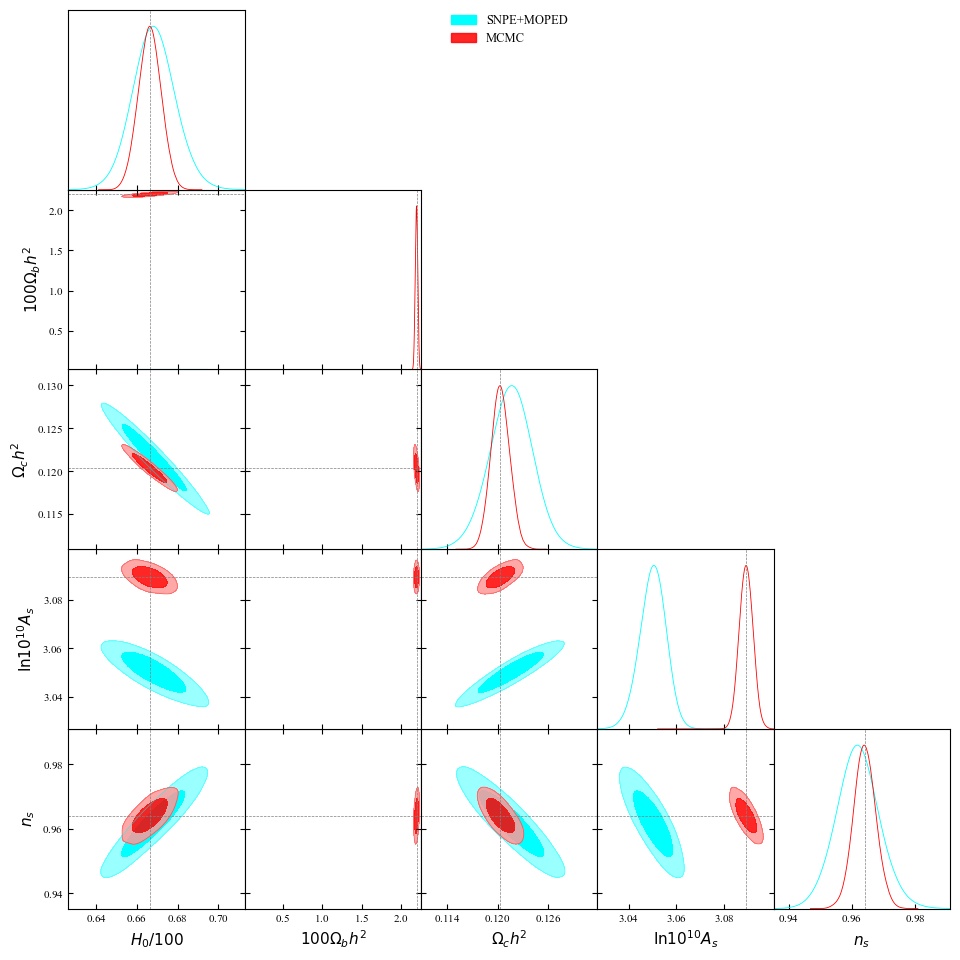

In [178]:
%matplotlib inline

param_names = ["param1", "param2", 'param3', 'param4', 'param5']
param_labels = [r"H_0 / 100", r"100 \Omega_b h^2", r'\Omega_c h^2', r'\ln 10^{10} A_s', r'n_s']

mcmc_samples = MCSamples(samples=data_reshape, names=param_names, labels=param_labels)
snpe_samples2 = MCSamples(samples=snpe_sample, names=param_names, labels=param_labels)

g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([snpe_samples2 ,mcmc_samples], filled=True, 
                contour_colors = ['cyan', 'red'],
                legend_labels=['SNPE+MOPED', 'MCMC'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 'param3': 0.1203, 'param4':3.0893, 'param5': 0.964, 
                          'color': 'black'}
                );

#plt.savefig('snpe_moped_vs_mcmc.pdf')

In [23]:
snpe0 = np.load('samples_snpe_0.npy')
snpe1 = np.load('samples_snpe_1.npy')

Removed no burn in
Removed no burn in
Removed no burn in


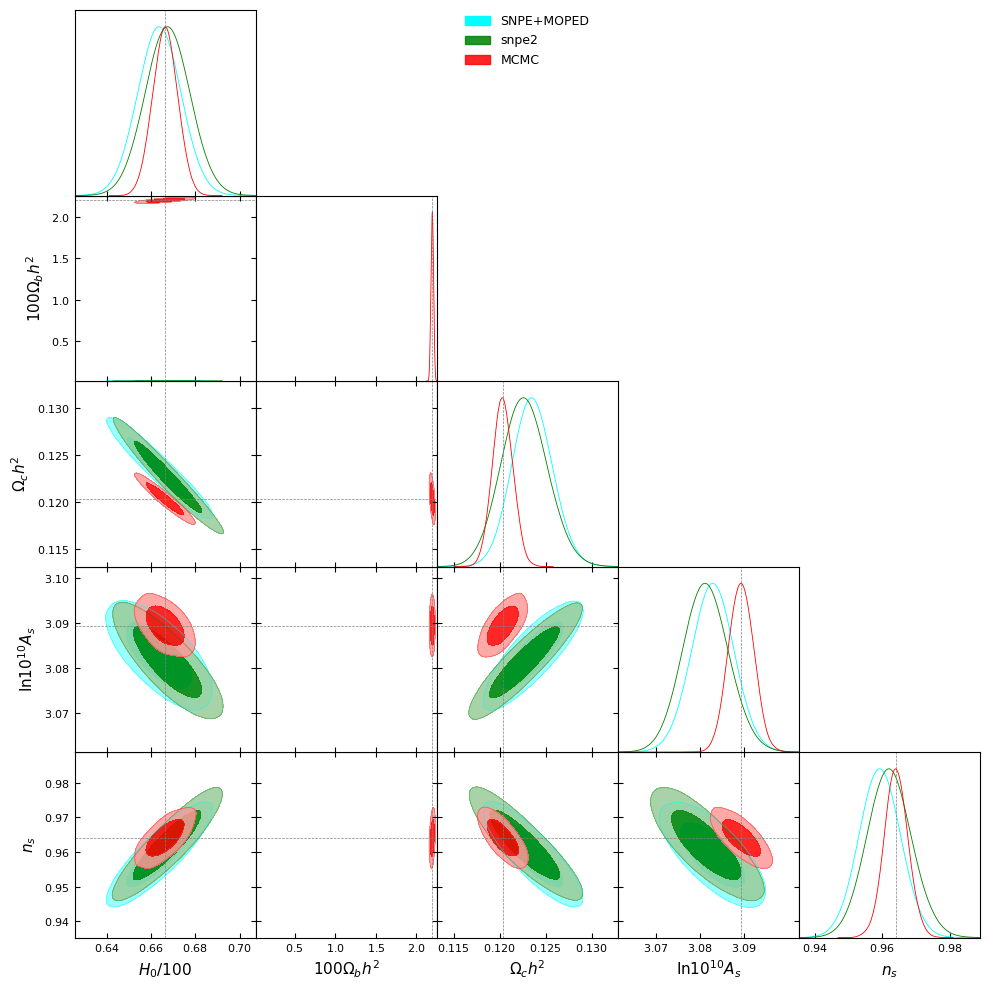

In [25]:
%matplotlib inline

param_names = ["param1", "param2", 'param3', 'param4', 'param5']
param_labels = [r"H_0 / 100", r"100 \Omega_b h^2", r'\Omega_c h^2', r'\ln 10^{10} A_s', r'n_s']

mcmc_samples = MCSamples(samples=data_reshape, names=param_names, labels=param_labels)
snpe_samples0 = MCSamples(samples=snpe0, names=param_names, labels=param_labels)
snpe_samples1 = MCSamples(samples=snpe1, names=param_names, labels=param_labels)


g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.triangle_plot([snpe_samples0, snpe_samples1, mcmc_samples], filled=True, 
                contour_colors = ['cyan', 'green','red'],
                legend_labels=['SNPE+MOPED','snpe2', 'MCMC'], 
                markers ={'param1':0.6663, 'param2': 2.1963, 'param3': 0.1203, 'param4':3.0893, 'param5': 0.964, 
                          'color': 'black'}
                );

#plt.savefig('snpe_moped_vs_mcmc.pdf')